#  Comparing Classifiers for Building Classification Models

Another notebook done following :

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>



# 1) Make a synthetic dataset

a) Import library

In [23]:
from sklearn.datasets import make_classification

b) Generate dataset

In [24]:
X, Y = make_classification(n_samples=1000,n_classes=2, n_features=5, n_redundant=0, random_state=1)

c) Data dimension

In [25]:
X.shape

(1000, 5)

In [26]:
Y.shape

(1000,)

# 2) Splitting the data 80-20


a) Import the library

In [27]:
from sklearn.model_selection import train_test_split

b)Data Split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

c) Data dimension

In [29]:
X_train.shape

(800, 5)

In [30]:
Y_train.shape

(800,)

In [31]:
X_test.shape

(200, 5)

In [32]:
Y_test.shape

(200,)

# 3) Build classification models

In [33]:
# 3.1. Import modules

In [34]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [35]:
#3.2. Defining learning classifiers

In [36]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

# 4) Build Model, Apply Model on Test Data & Record Accuracy Scores

In [37]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [38]:
scores

[0.83,
 0.845,
 0.82,
 0.805,
 0.875,
 0.835,
 0.845,
 0.845,
 0.87,
 0.875,
 0.845,
 0.845,
 0.86,
 0.84]

# 5) Analysis of Model Performance

In [39]:
#a) Import library

In [40]:
import pandas as pd
import seaborn as sns

In [41]:
#b) create data frame of model performance

In [42]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.830
1,Linear_SVM,0.845
2,Polynomial_SVM,0.820
3,RBF_SVM,0.805
4,Gaussian_Process,0.875
5,Gradient_Boosting,0.835
6,Decision_Tree,0.845
7,Extra_Trees,0.845
8,Random_Forest,0.870
9,Neural_Net,0.875


In [43]:
#c) adding colors to the data frame

In [44]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.830000
1,Linear_SVM,0.845000
2,Polynomial_SVM,0.820000
3,RBF_SVM,0.805000
4,Gaussian_Process,0.875000
5,Gradient_Boosting,0.835000
6,Decision_Tree,0.845000
7,Extra_Trees,0.845000
8,Random_Forest,0.870000
9,Neural_Net,0.875000


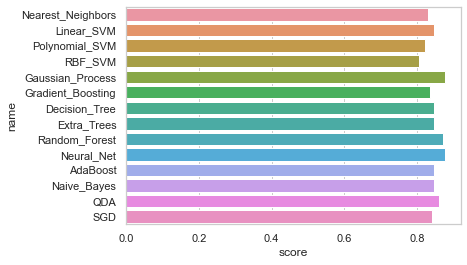

In [45]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)